In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

Using TensorFlow backend.


### Данные:
Будем работать с датасетом [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). 

In [3]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

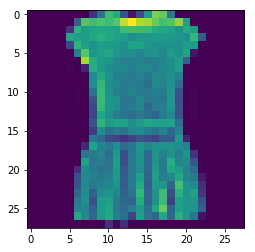

In [4]:
plt.imshow(X_train[3].reshape([28,28]))

### Задание:
Будем решать задачу классификации на 10 классов. Каждый класс соответствует одному из типов одежды. Исходная размерность признакового пространства: `784`, каждый пиксель является признаком. Будем снижать размерность признакового пространства с помощью метода главных компонент (`PCA`). Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа главных компонент. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа главных компонент.

In [5]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
pca = PCA(n_components=3)
used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
lr = LogisticRegression()
lr.fit(X_train_lowdim, y_train[used_indices])
accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))

0.5803

Используйте следующую сетку числа главных компонент: `[3, 5, 7, 12, 18, 25, 33, 40, 48, 55]`. Для ускорения сходимости можете семплировать подвыборки из `X_train`. 

In [7]:
pca = PCA(n_components=3)

In [8]:
main_components = [3, 5, 7, 12, 18, 25, 33, 40, 48, 55]

In [57]:
def dimension(N):
    pca = PCA(n_components=N)
    used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
    X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
    lr = LogisticRegression()
    lr.fit(X_train_lowdim, y_train[used_indices])
    return lr.predict(pca.transform(X_test.reshape([-1, 784])))

def accuracy(component):
    accuracy_list = []
    for i in range(10):
        accuracy_list.append(accuracy_score(y_test, dimension(component)))
        
    return np.mean(accuracy_list)



In [58]:
results = []
for i in main_components:
    results.append(accuracy(i))

print(results)

[0.57732, 0.6744299999999999, 0.69299, 0.7449600000000001, 0.77714, 0.79221, 0.79945, 0.80794, 0.8150700000000001, 0.8179399999999999]


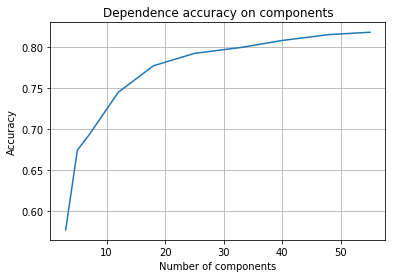

In [59]:
flg = plt.figure()
x = main_components
y = results
plt.plot(x,y)
plt.title("Dependence accuracy on components")
plt.xlabel("Number of components")
plt.ylabel("Accuracy")
plt.grid(True)

In [60]:
def dispersion(component):
    dispersion_list = []
    for i in range(10):
        dispersion_list.append(accuracy_score(y_test, dimension(component)))
        
    return np.var(dispersion_list)

In [61]:
variancy = []
for i in main_components:
    variancy.append(accuracy(i))

print(variancy)

[0.5773699999999999, 0.67549, 0.6918, 0.74505, 0.7770300000000001, 0.7926, 0.7995399999999999, 0.80756, 0.8155699999999999, 0.8161400000000001]


In [ ]:
flg = plt.figure()
x = main_components
y = variancy
plt.plot(x,y)
plt.title("Dependence dispersion on components")
plt.xlabel("Number of components")
plt.ylabel("Dispersion")
plt.grid(True)

In [10]:
number_of_components = 40
sets = np.arange(1000, 10500, 500)

In [12]:
acc = []
var = []
for set_size in sets:
    arr_var = []
    for _ in range(4):
        pca = PCA(n_components=number_of_components)
        used_indices = np.random.choice(np.arange(X_train.shape[0]), set_size, replace=False)
        X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
        lr = LogisticRegression()
        lr.fit(X_train_lowdim, y_train[used_indices])
        y_pred = lr.predict(pca.transform(X_test.reshape([-1, 784])))
        arr_var.append(accuracy_score(y_test, y_pred))
    
    acc.append(np.mean(arr_var))
    var.append(np.var(arr_var))

In [13]:
print(acc)

[0.7825, 0.789825, 0.7923, 0.7948000000000001, 0.79835, 0.8039499999999999, 0.8026249999999999, 0.8019, 0.8047, 0.80505, 0.8062250000000001, 0.8061750000000001, 0.806025, 0.80635, 0.807075, 0.8078000000000001, 0.808, 0.807775, 0.8074749999999999]


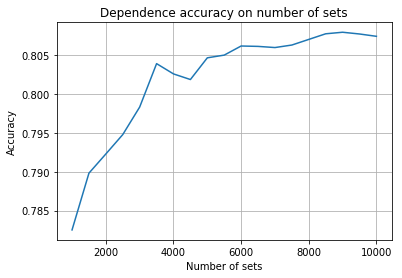

In [14]:
flg = plt.figure()
x = sets
y = acc
plt.plot(x,y)
plt.title("Dependence accuracy on number of sets")
plt.xlabel("Number of sets")
plt.ylabel("Accuracy")
plt.grid(True)